#KNN (K-Nearest Neighbours)
- it predicts a label for a new data point by looking at its neighbors.

**STEPS**
1. Pick a K value (K=number of neighbors)
2. For a new data point(called as query point), calculate its distance(Euclidean distance) from all other points in the dataset.
3. Find the K closest points(neighbors)
4. Classify on the basis of majority

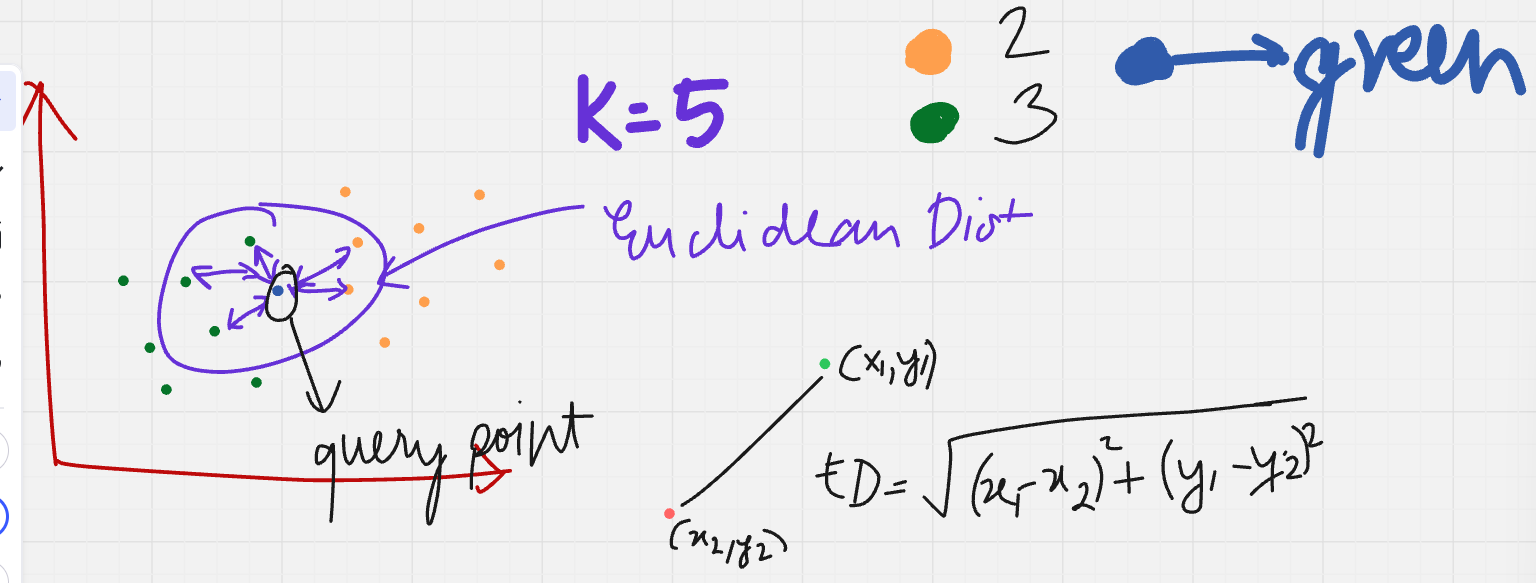

In [ ]:
#Dataset Link: https://drive.google.com/file/d/12-ZA7khoi7vJW7EKXvjYwqAdhcyvVG4H/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [ ]:
#finding the percentage of null values in each column
#if a column has more than 50% of null values, drop that column
df.isnull().mean()*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
df_new=df[['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]

In [ ]:
df_new

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
df_new.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986


In [ ]:
for col in df_new.columns:
  if (df_new[col].dtype)=='object':
    df_new[col]=df_new[col].fillna(df_new[col].mode()[0])
  else:
    df_new[col]=df_new[col].fillna(df_new[col].mean())

/tmp/ipython-input-404528775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col]=df_new[col].fillna(df_new[col].mode()[0])


In [ ]:
df_new['Symptom_1'].mode()[0]

' vomiting'

In [ ]:
df_new

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
3,Fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,headache,nausea
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,headache,nausea
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
df_new.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0
Symptom_6,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4920 non-null   object
 5   Symptom_5  4920 non-null   object
 6   Symptom_6  4920 non-null   object
dtypes: object(7)
memory usage: 269.2+ KB


In [ ]:
df_new.shape

(4920, 7)

#Why not remove duplicates in KNN?
- In KNN, every data points(row) is like a vote.
- If two data points are exactly the same(duplicates), they both vote for the same class.
- That's not wrong -> actually make the classification stronger.
- Removing duplicates would weaken the evidence

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [ ]:
# for col in df_new.columns:
#   df_new[col]=le.fit_transform(df_new[col])

#   #enumerate: gives both index and category name, therefore we're using 2 variables
#   for idx,cls in enumerate(le.classes_):
#     print(f"{cls} -> {idx}")

In [ ]:
df_new

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,headache,nausea
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,high_fever,headache,nausea
3,Fungal infection,itching,skin_rash,dischromic _patches,high_fever,headache,nausea
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,high_fever,headache,nausea
...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,headache,nausea
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,headache,nausea
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails


In [ ]:
mappings = {}
df_new['Disease'] = le.fit_transform(df_new['Disease'])
mappings['Disease'] = dict(zip(le.classes_, le.transform(le.classes_)))
Disease_label = pd.DataFrame(list(mappings['Disease'].items()), columns=['Disease', 'Label'])
for col in ["Symptom_1","Symptom_2","Symptom_3","Symptom_4","Symptom_5","Symptom_6"]:
    df_new[col] = le.fit_transform(df_new[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
# Print mappings neatly
for col, mapping in mappings.items():
    print(f"\nColumn: {col}")
    for cls, idx in mapping.items():
        print(f"{cls} -> {idx}")


Column: Disease
(vertigo) Paroymsal  Positional Vertigo -> 0
AIDS -> 1
Acne -> 2
Alcoholic hepatitis -> 3
Allergy -> 4
Arthritis -> 5
Bronchial Asthma -> 6
Cervical spondylosis -> 7
Chicken pox -> 8
Chronic cholestasis -> 9
Common Cold -> 10
Dengue -> 11
Diabetes  -> 12
Dimorphic hemmorhoids(piles) -> 13
Drug Reaction -> 14
Fungal infection -> 15
GERD -> 16
Gastroenteritis -> 17
Heart attack -> 18
Hepatitis B -> 19
Hepatitis C -> 20
Hepatitis D -> 21
Hepatitis E -> 22
Hypertension  -> 23
Hyperthyroidism -> 24
Hypoglycemia -> 25
Hypothyroidism -> 26
Impetigo -> 27
Jaundice -> 28
Malaria -> 29
Migraine -> 30
Osteoarthristis -> 31
Paralysis (brain hemorrhage) -> 32
Peptic ulcer diseae -> 33
Pneumonia -> 34
Psoriasis -> 35
Tuberculosis -> 36
Typhoid -> 37
Urinary tract infection -> 38
Varicose veins -> 39
hepatitis A -> 40

Column: Symptom_1
 acidity -> 0
 back_pain -> 1
 bladder_discomfort -> 2
 breathlessness -> 3
 burning_micturition -> 4
 chest_pain -> 5
 chills -> 6
 constipation -> 

/tmp/ipython-input-594221691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Disease'] = le.fit_transform(df_new['Disease'])
/tmp/ipython-input-594221691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = le.fit_transform(df_new[col])
/tmp/ipython-input-594221691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Disease_label=le.classes_

In [ ]:
Disease_label

,Disease,Label
0,(vertigo) Paroymsal Positional Vertigo,0
1,AIDS,1
2,Acne,2
3,Alcoholic hepatitis,3
4,Allergy,4
5,Arthritis,5
6,Bronchial Asthma,6
7,Cervical spondylosis,7
8,Chicken pox,8
9,Chronic cholestasis,9


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Disease    4920 non-null   int64
 1   Symptom_1  4920 non-null   int64
 2   Symptom_2  4920 non-null   int64
 3   Symptom_3  4920 non-null   int64
 4   Symptom_4  4920 non-null   int64
 5   Symptom_5  4920 non-null   int64
 6   Symptom_6  4920 non-null   int64
dtypes: int64(7)
memory usage: 269.2 KB


In [ ]:
x=df_new.drop('Disease', axis=1)
y=df_new['Disease']

In [ ]:
x

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,33,35,35,11,12,20
1,24,27,18,19,12,20
2,33,27,18,19,12,20
3,33,35,18,19,12,20
4,33,35,35,19,12,20
...,...,...,...,...,...,...
4915,28,17,33,38,22,29
4916,24,31,3,35,12,20
4917,4,4,22,7,12,20
4918,24,20,42,36,27,15


In [ ]:
y

,Disease
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


In [ ]:
y.unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [ ]:
y.nunique()

41

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [ ]:
x_train.shape

(3936, 6)

In [ ]:
x_test.shape

(984, 6)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier()

model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import *
acc=accuracy_score(y_pred,y_test)

In [ ]:
#TESTING ACCURACY
acc

0.9847560975609756

In [ ]:
#.score()-> predicts and gives accuracy
# acc2=model.score(x_test,y_test)
# acc2*100

In [ ]:
#TRAINING ACCURACY
acc_train=model.score(x_train,y_train)
acc_train

0.9961890243902439

**CHECK FOR A NEW RECORD**

In [ ]:
new_rec=pd.DataFrame(columns=x.columns)
new_rec

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6


In [ ]:
new_rec.loc[0]=[33,35,15,22,14,13]
new_rec

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,33,35,15,22,14,13


In [ ]:
model.predict(new_rec)

array([8])

In [ ]:
# Disease_label[8]

In [ ]:
# df_new[df_new['Disease']==8]

In [ ]:
#1. Create the disease label variable in a way that it stores only the label encoded value for disease column
#2. Visualization of clusters(scatterplot) and the new data point